### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [0]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

#### Collect Fashion mnist data from tf.keras.datasets 

Shape of the Xtrain (60000, 28, 28)


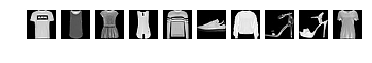

Dimensions of an image: (28, 28)
No. of samples in the training set: 60000
No. of samples in the training set: 60000
No. of samples in the test set: 10000
No. of samples in the test set: 10000


In [0]:
from keras.datasets import fashion_mnist
(xtrain, ytrain),(xtest, ytest) = fashion_mnist.load_data()
print("Shape of the Xtrain",xtrain.shape)
for i in range(1,11):
    plt.subplot(1,10,i)
    plt.axis("off")
    plt.imshow(xtrain[i,:,:], cmap="gray")
    plt.plot()
plt.show()
print("Dimensions of an image:", xtrain[0].shape)
print("No. of samples in the training set:", xtrain.shape[0])
print("No. of samples in the training set:", ytrain.shape[0])
print("No. of samples in the test set:", xtest.shape[0])
print("No. of samples in the test set:", ytest.shape[0])

In [0]:
df = pd.DataFrame(ytrain)
num_classes = len(df[0].unique())
print("Number of classes : ", num_classes)

Number of classes :  10


#### Change train and test labels into one-hot vectors

In [0]:
y_train = np_utils.to_categorical(ytrain, num_classes)
y_test = np_utils.to_categorical(ytest, num_classes)
y_train[2]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#### Build the Graph

#### Initialize model, reshape & normalize data

In [0]:
#Initiaze model
model = Sequential()

# Reshape the dataset
x_train = xtrain.reshape(xtrain.shape[0],28,28,1).astype("float32")
x_test = xtest.reshape(xtest.shape[0],28,28,1).astype("float32")
#Represent Training & Testing samples suitable for 
#tensorflow backend

#normalize the dataset
x_train/=255
x_test/=255

In [0]:
y_train.shape

(60000, 10)

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [0]:

model = Sequential()
model.add(Flatten())
model.add(Dense(200, activation="relu",input_shape=(28,28,1)))
model.add(Dense(100, activation="relu"))
model.add(Dropout(0.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [0]:
from keras.optimizers import Adam 
adam = keras.optimizers.Adam(lr=0.001)

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 207us/step - loss: 0.5159 - acc: 0.8133 - val_loss: 0.4508 - val_acc: 0.8311
Epoch 2/10
60000/60000 [==============================] - 11s 186us/step - loss: 0.3841 - acc: 0.8618 - val_loss: 0.3921 - val_acc: 0.8611
Epoch 3/10
60000/60000 [==============================] - 11s 186us/step - loss: 0.3461 - acc: 0.8724 - val_loss: 0.3576 - val_acc: 0.8734
Epoch 4/10
60000/60000 [==============================] - 11s 186us/step - loss: 0.3233 - acc: 0.8821 - val_loss: 0.3603 - val_acc: 0.8714
Epoch 5/10
60000/60000 [==============================] - 11s 185us/step - loss: 0.3044 - acc: 0.8875 - val_loss: 0.3655 - val_acc: 0.8630
Epoch 6/10
60000/60000 [==============================] - 11s 186us/step - loss: 0.2917 - acc: 0.8906 - val_loss: 0.3216 - val_acc: 0.8844
Epoch 7/10
60000/60000 [==============================] - 11s 187us/step - loss: 0.2804 - acc: 0.8961 - val_loss: 0.

In [0]:
score=model.evaluate(x_test,y_test)
print("Validation report : ",score)

10000/10000 [==============================] - 1s 69us/step
Validation report :  [0.3389784048318863, 0.8826]


In [0]:
y_predict = model.predict(x_test)
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
#print(y_pred)    
#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(ytest,y_pred)
print(cm)


[[823   0  10  20   0   1 141   0   5   0]
 [  3 962   1  24   4   0   4   0   1   1]
 [ 11   0 751  10 114   0 114   0   0   0]
 [ 22   6   6 891  36   0  37   0   2   0]
 [  0   0  59  33 791   0 117   0   0   0]
 [  0   0   0   0   0 960   0  32   1   7]
 [102   0  56  27  46   0 762   0   7   0]
 [  0   0   0   0   0  11   0 976   0  13]
 [  6   0   1   6   2   3   7   3 972   0]
 [  0   0   0   0   0   7   1  54   0 938]]


In [0]:
cr=metrics.classification_report(ytest,y_pred)
print("Classification report")
print(cr)

Classification report
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.85      0.75      0.80      1000
           3       0.88      0.89      0.89      1000
           4       0.80      0.79      0.79      1000
           5       0.98      0.96      0.97      1000
           6       0.64      0.76      0.70      1000
           7       0.92      0.98      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



The accuracy is 0.8826 on validation data, there is imbalance in data represented in classification report, the classification 6 did not get enough enough accuracy in the Classification report. Accuracy for classification 6 is low compared to other classification.